# Exploratory Data Analysis -- Flikr8K dataset

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter
import numpy as np

In [2]:
DATA_DIR = './data'
IMAGES_DIR = os.path.join(DATA_DIR, 'Images')
CAPTIONS_FILE = os.path.join(DATA_DIR, 'captions.txt')

### Общи данни: брой изображения и описания

In [3]:
df = pd.read_csv(CAPTIONS_FILE, sep=',', names=['image', 'caption'], header=None)

print(f"Total Captions: {len(df)}")
print(f"Unique Images: {df['image'].nunique()}")
display(df.head())

Total Captions: 40456
Unique Images: 8092


,image,caption
0,image,caption
1,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
2,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
3,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
4,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...


### Генериране на произволни sample-и

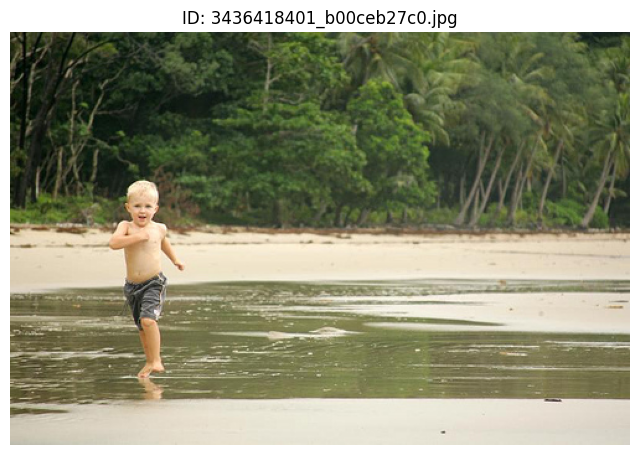

Captions:
- A small child running on the beach
- A young boy in swim trunks runs along a sandy beach .
- A young boy runs through the water on a beach near trees .
- A young child is running through a large puddle at a beach surrounded by trees .
- Young boy walking along the beach .
--------------------------------------------------


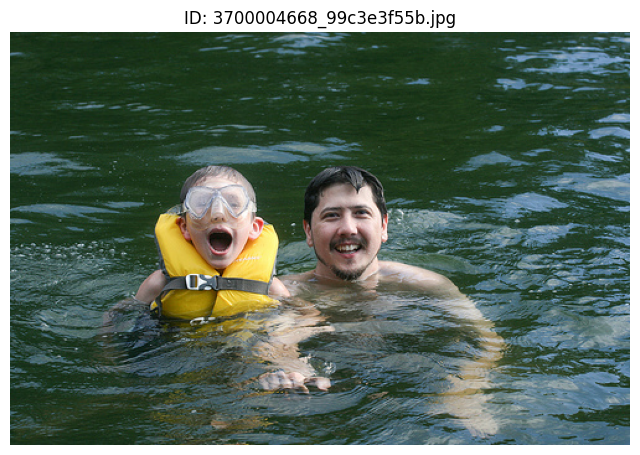

Captions:
- A boy with his mouth wide open dressed in a yellow life jacket and goggles in water with a man next to him .
- A father and child enjoy the water .
- A man and child wearing a yellow life vest look up from the water .
- An open mouthed child in goggles and a yellow life vest poses with a smiling man .
- Man and boy wearing life jacket in water posing for a picture
--------------------------------------------------


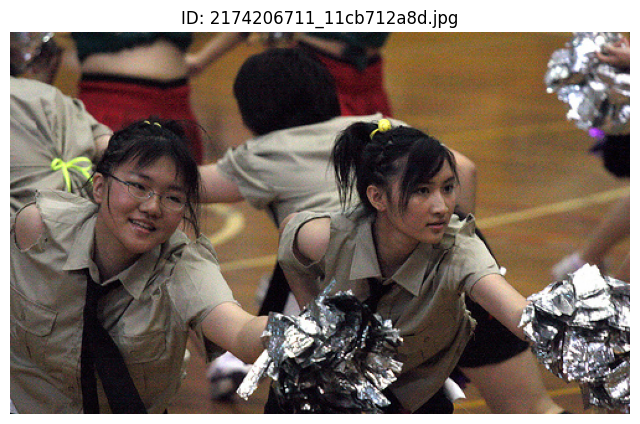

Captions:
- Two Asian cheerleaders are facing forward waving silver pom-poms , whilst other cheerleaders are performing facing the other way .
- Two asian cheerleaders are holding out silver pompoms .
- Two asian girls cheerleading for a sporting event
- Two girls dressed in light brown wearing black neckties hold foil pom poms while doing a routine with others .
- Two young girl cheerleaders wearing a khaki shirt with a black tie cheering .
--------------------------------------------------


In [4]:
def visualize_sample(df, num_samples=3):
    unique_images = df['image'].unique()
    samples = np.random.choice(unique_images, num_samples, replace=False)

    for img_name in samples:
        img_path = os.path.join(IMAGES_DIR, img_name)

        captions = df[df['image'] == img_name]['caption'].values

        try:
            image = Image.open(img_path)
            plt.figure(figsize=(8, 8))
            plt.imshow(image)
            plt.axis('off')
            plt.title(f"ID: {img_name}")
            plt.show()

            print("Captions:")
            for cap in captions:
                print(f"- {cap}")
            print("-" * 50)

        except FileNotFoundError:
            print(f"Warning: Image {img_name} not found in {IMAGES_DIR}")

visualize_sample(df)

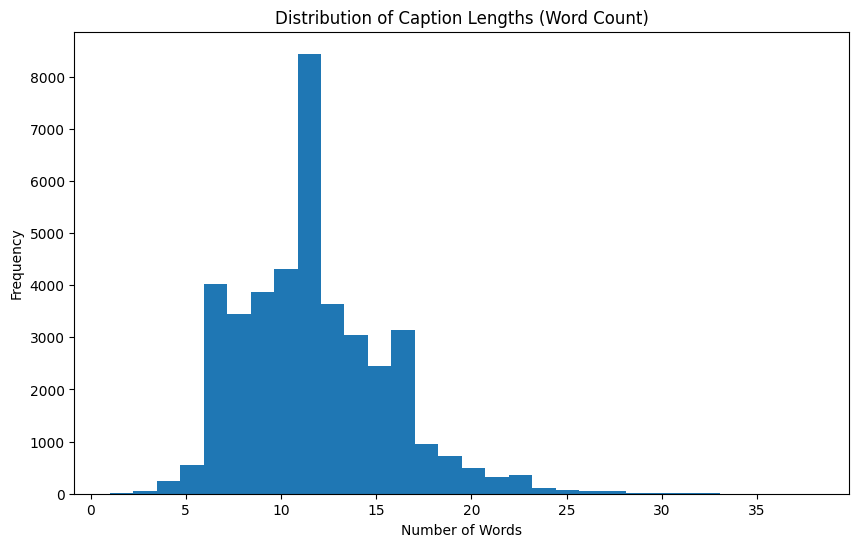

Max word count: 38
95th percentile word count: 19.0


In [5]:
df['word_count'] = df['caption'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 6))
plt.hist(df['word_count'], bins=30)
plt.title('Distribution of Caption Lengths (Word Count)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

print(f"Max word count: {df['word_count'].max()}")
print(f"95th percentile word count: {np.percentile(df['word_count'], 95)}")

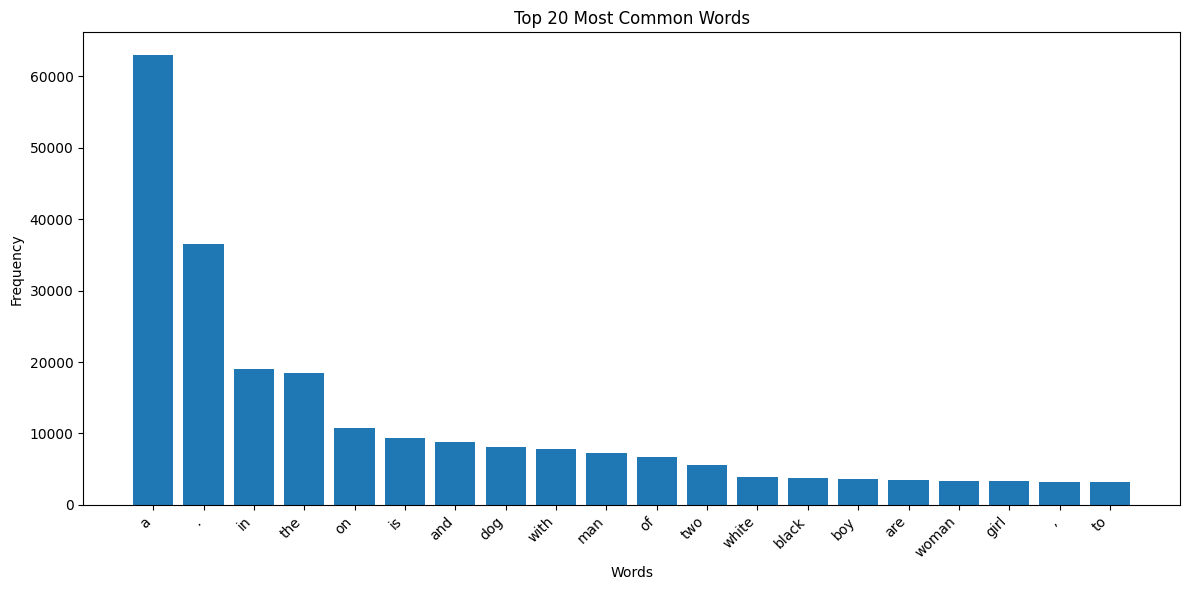

Total unique words (Vocabulary Size): 8919


In [6]:
from collections import Counter
import matplotlib.pyplot as plt

# Flatten all captions into a huge list of words
all_captions = " ".join(df['caption'].astype(str)).lower()
words = all_captions.split()
word_freq = Counter(words)

# Get top 20 words
common_words = word_freq.most_common(20)
words_, counts_ = zip(*common_words)

# Plot using matplotlib only
plt.figure(figsize=(12, 6))
plt.bar(words_, counts_)
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"Total unique words (Vocabulary Size): {len(word_freq)}")


Забележка: по принцип при тренирането махаме синтаксиса, защото LSTM-ът силно се обърква от него. Но понеже това е data analysis, сме оставили символите "." и " ' " в хистограмата